<a href="https://colab.research.google.com/github/JafariAmin/NLP/blob/main/NLPProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!dir

drive  sample_data


In [ ]:
%cd drive/MyDrive/Project2_Data
!dir

/content/drive/MyDrive/Project2_Data
DisneylandReviews.csv


In [ ]:
import pandas as pd
df = pd.read_csv('DisneylandReviews.csv', encoding='latin-1')

In [ ]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [ ]:
df.shape

(42656, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [ ]:
import matplotlib.pyplot as plt

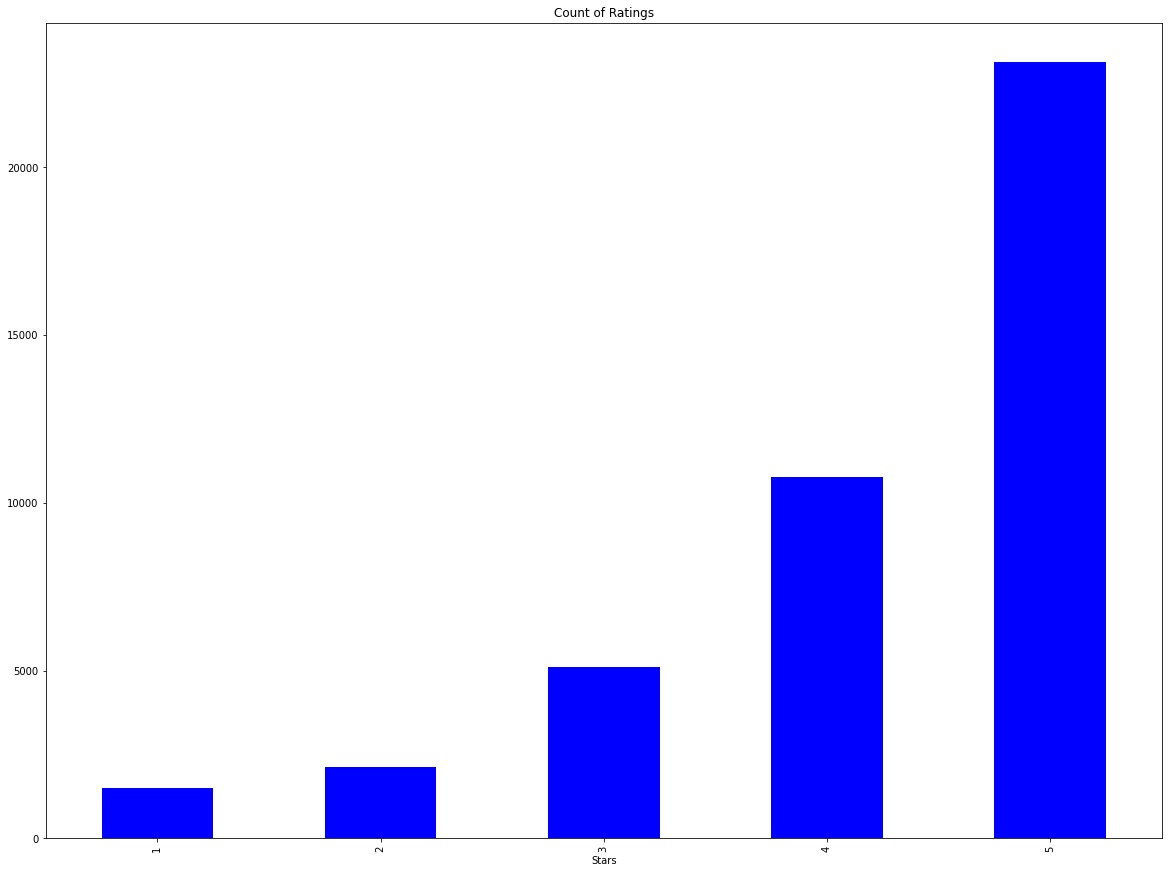

In [ ]:
df['Rating'].value_counts(ascending=True).plot(kind='bar', title='Count of Ratings', figsize=(20,15), color='blue', xlabel='Stars')
plt.show()

In [ ]:
import seaborn as sns

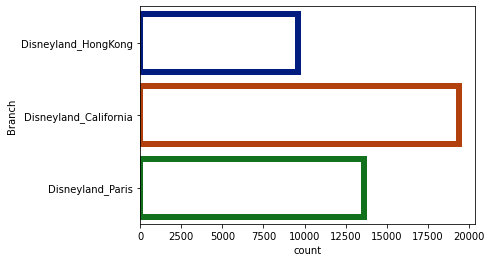

In [ ]:
sns.countplot(y='Branch', data=df, facecolor=(1, 1, 1, 1), linewidth=6, edgecolor = sns.color_palette('dark', 4))

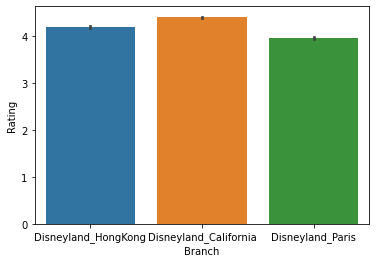

In [ ]:
sns.barplot(x = df['Branch'], y = df['Rating'])

In [ ]:
df.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [ ]:
df.drop(df.columns[[0, 2, 3, 5]], axis = 1, inplace = True)

In [ ]:
df.head()

,Rating,Review_Text
0,4,If you've ever been to Disneyland anywhere you...
1,4,Its been a while since d last time we visit HK...
2,4,Thanks God it wasn t too hot or too humid wh...
3,4,HK Disneyland is a great compact park. Unfortu...
4,4,"the location is not in the city, took around 1..."


In [ ]:
df = df[['Review_Text', 'Rating']]

In [ ]:
df.head()

,Review_Text,Rating
0,If you've ever been to Disneyland anywhere you...,4
1,Its been a while since d last time we visit HK...,4
2,Thanks God it wasn t too hot or too humid wh...,4
3,HK Disneyland is a great compact park. Unfortu...,4
4,"the location is not in the city, took around 1...",4


In [ ]:
df.isnull().sum()

Review_Text    0
Rating         0
dtype: int64

In [ ]:
df.duplicated().sum()

23

In [ ]:
df.drop_duplicates(inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df.duplicated().sum()

0

In [ ]:
blanks = []

In [ ]:
for index in df['Review_Text']:
  if index.isspace():
    blanks.append(index)

In [ ]:
blanks

[]

In [ ]:
df['Pos/Neg'] = df['Rating'].apply(lambda rating: "Positive" if rating > 2 else "Negative")

<ipython-input-46-fd7926e850f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pos/Neg'] = df['Rating'].apply(lambda rating: "Positive" if rating > 2 else "Negative")


In [ ]:
df.head(10)

,Review_Text,Rating,Pos/Neg
0,If you've ever been to Disneyland anywhere you...,4,Positive
1,Its been a while since d last time we visit HK...,4,Positive
2,Thanks God it wasn t too hot or too humid wh...,4,Positive
3,HK Disneyland is a great compact park. Unfortu...,4,Positive
4,"the location is not in the city, took around 1...",4,Positive
5,"Have been to Disney World, Disneyland Anaheim ...",3,Positive
6,Great place! Your day will go by and you won't...,5,Positive
7,Think of it as an intro to Disney magic for th...,3,Positive
8,"Feel so let down with this place,the Disneylan...",2,Negative
9,I can go on talking about Disneyland. Whatever...,5,Positive


Sentiment Analysis

In [ ]:
import nltk

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentanalyzer = SentimentIntensityAnalyzer()

In [ ]:
df['Scores'] = df['Review_Text'].apply(lambda review: sentanalyzer.polarity_scores(review))

<ipython-input-53-89b85d5b4c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Scores'] = df['Review_Text'].apply(lambda review: sentanalyzer.polarity_scores(review))


In [ ]:
df['Compound'] = df['Scores'].apply(lambda score: score['compound'])

<ipython-input-58-0986efce1ffd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Compound'] = df['Scores'].apply(lambda score: score['compound'])


In [ ]:
df.head(10)

,Review_Text,Rating,Pos/Neg,Scores,Compound
0,If you've ever been to Disneyland anywhere you...,4,Positive,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069
1,Its been a while since d last time we visit HK...,4,Positive,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901
2,Thanks God it wasn t too hot or too humid wh...,4,Positive,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920
3,HK Disneyland is a great compact park. Unfortu...,4,Positive,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489
4,"the location is not in the city, took around 1...",4,Positive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846
5,"Have been to Disney World, Disneyland Anaheim ...",3,Positive,"{'neg': 0.073, 'neu': 0.755, 'pos': 0.172, 'co...",0.9653
6,Great place! Your day will go by and you won't...,5,Positive,"{'neg': 0.087, 'neu': 0.693, 'pos': 0.22, 'com...",0.7489
7,Think of it as an intro to Disney magic for th...,3,Positive,"{'neg': 0.03, 'neu': 0.868, 'pos': 0.102, 'com...",0.7902
8,"Feel so let down with this place,the Disneylan...",2,Negative,"{'neg': 0.076, 'neu': 0.826, 'pos': 0.098, 'co...",0.5195
9,I can go on talking about Disneyland. Whatever...,5,Positive,"{'neg': 0.028, 'neu': 0.8, 'pos': 0.172, 'comp...",0.9645


In [ ]:
df['Prediction'] = df['Compound'].apply(lambda n: "Positive" if n>= 0 else "Negative")

In [ ]:
df.head()

,Review_Text,Rating,Pos/Neg,Scores,Compound,Prediction
0,If you've ever been to Disneyland anywhere you...,4,Positive,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069,Positive
1,Its been a while since d last time we visit HK...,4,Positive,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901,Positive
2,Thanks God it wasn t too hot or too humid wh...,4,Positive,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920,Positive
3,HK Disneyland is a great compact park. Unfortu...,4,Positive,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489,Positive
4,"the location is not in the city, took around 1...",4,Positive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846,Positive


Text Classification

In [ ]:
X = df['Review_Text']
y = df['Pos/Neg']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
textclf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
textclf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
predictions = textclf.predict(X_test)

In [ ]:
print(accuracy_score(predictions, y_test))

0.9411472030705808


In [ ]:
cm = confusion_matrix(predictions, y_test)
print(cm)

[[  616   246]
 [  582 12625]]


In [ ]:
import matplotlib

In [ ]:
matplotlib.rc('figure', figsize = (20, 10))

In [ ]:
cm_display= ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= [False, True])

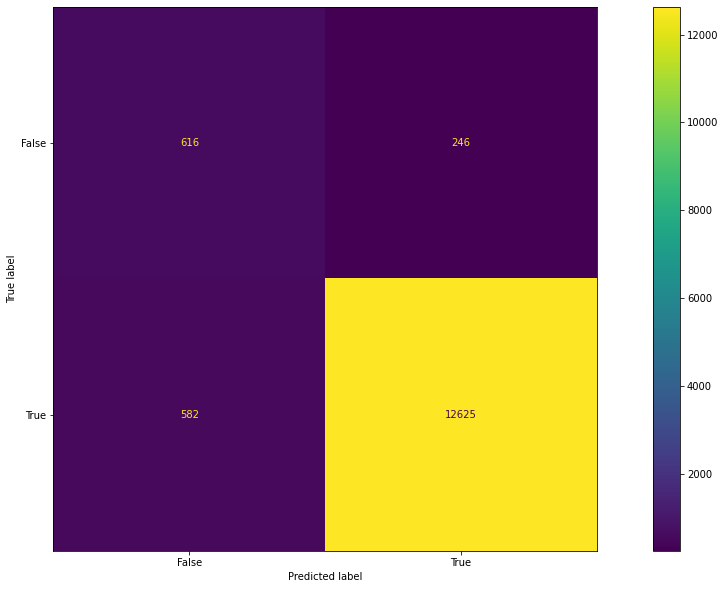

In [ ]:
cm_display.plot()
plt.show()